In [ ]:
!pip3 install bert-extractive-summarizer
!pip install transformers
!pip install datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 35

In [ ]:
import torch
import datasets
import numpy as np
import pandas as pd
from datasets import load_dataset,DatasetDict
import torch.nn as nn
from transformers.optimization import Adafactor
import transformers
from summarizer import Summarizer 
from transformers import GPT2LMHeadModel, GPT2TokenizerFast,AutoConfig
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch.nn import functional as F

In [ ]:
raw_datasets = load_dataset("xsum")
train_data = raw_datasets['train']
test_data = raw_datasets['test']

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

Dataset xsum downloaded and prepared to /root/.cache/huggingface/datasets/xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
summarizer = Summarizer()

def extract_important_sentence(example, model):
  text = example['document']
  result = model(text, num_sentences=3)
  return {'important_sentences':result}

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
raw_datasets = DatasetDict(
    {
        "train": train_data.select(range(500)),
        "test": test_data.select(range(500)),
    }
)

In [ ]:
raw_datasets =  raw_datasets.map(lambda example:extract_important_sentence(example, summarizer))

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained('gpt2').to("cuda")

In [ ]:
tokenizer.add_special_tokens({'pad_token':'[PAD]'})
PAD_IDX = tokenizer.pad_token_id
PAD_IDX

50257

In [ ]:
config = AutoConfig.from_pretrained(
    "gpt2",
    vocab_size=len(tokenizer),
    n_ctx=512,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
)
model = GPT2LMHeadModel(config).to("cuda")

In [ ]:
prefix_len = 100
def preprocess_function(examples, prefix_len=100, padding=True):
    text_column = 'document'
    summary_column = 'summary'
    important_column = 'important_sentences'

    max_source_length = 512  
    max_target_length = 512

    text = examples[text_column]
    targets = examples[summary_column]
    important = examples[important_column]

    #inputs = " ".join(text.split(' '))[:300]  #for each sample we are only taking 200 words
    #inputs = '<|endoftext|>' + inputs + 'TL;DR:' + targets + '<|endoftext|>'
    #tokenize inputs, label and important sentences
    #model_inputs = tokenizer(text, return_tensors="pt", padding=padding, max_length=max_source_length, truncation=True)
    labels = tokenizer(targets, padding=padding, max_length=max_target_length, return_tensors="pt", truncation=True)
    importance_sentences = tokenizer(important, padding="max_length", max_length=prefix_len, return_tensors="pt", truncation=True)
    input_length = importance_sentences['input_ids'].shape[1]
    target_length = labels["input_ids"].shape[1]

    #print(max_source_length,target_length,prefix_len,input_length)
    #concat input ids with importance sentences in the front and label in the back
    importance_sentences['input_ids'] = torch.cat([torch.full((1,prefix_len),1),importance_sentences['input_ids'],torch.full((1,max_source_length-prefix_len-input_length), PAD_IDX)],1)
    #print('Input shape',model_inputs['input_ids'].shape)
    #concat label with -100 in the front and padding
    labels["input_ids"] = torch.cat([torch.full((1,prefix_len),-100), labels['input_ids'],torch.full((1,max_target_length-prefix_len-target_length), PAD_IDX)],1)
    importance_sentences["labels"] = labels["input_ids"]
    #print(labels['input_ids'].shape)
    #concat attention with 0 in the back
    attention_length = importance_sentences["attention_mask"].shape[1]
    importance_sentences["attention_mask"] = torch.cat([torch.full((1,prefix_len),1),importance_sentences['attention_mask'],torch.full((1,max_source_length-prefix_len-attention_length), 1)],1)

    return importance_sentences

In [ ]:
column_names = ['document', 'summary','id','important_sentences']
new_train_dataset = raw_datasets["train"].map(lambda example : preprocess_function(example,prefix_len),remove_columns=column_names)


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
new_test_dataset = raw_datasets["test"].map(lambda example : preprocess_function(example,prefix_len),remove_columns=['summary','id','important_sentences'])

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
BATCH_SIZE = 8
new_train_dataset.set_format("torch")
loader = DataLoader(new_train_dataset, batch_size=BATCH_SIZE)

In [ ]:
for batch in loader:
    input=batch["input_ids"].to("cuda:0")
    attention = batch["attention_mask"].to("cuda:0")
    label = batch["labels"].to("cuda:0")
    print(input.shape)
    print(attention.shape)
    print(label.shape)
    break

torch.Size([8, 1, 512])
torch.Size([8, 1, 512])
torch.Size([8, 1, 512])


In [ ]:
class SoftEmbedding(nn.Module):
    def __init__(self, 
                wte: nn.Embedding,
                n_tokens: int = 10, 
                random_range: float = 0.5,
                initialize_from_vocab: bool = True):
        """appends learned embedding to 
        Args:
            wte (nn.Embedding): original transformer word embedding
            n_tokens (int, optional): number of tokens for task. Defaults to 10.
            random_range (float, optional): range to init embedding (if not initialize from vocab). Defaults to 0.5.
            initialize_from_vocab (bool, optional): initalizes from default vocab. Defaults to True.
        """
        super(SoftEmbedding, self).__init__()
        self.wte = wte
        self.n_tokens = n_tokens
        self.learned_embedding = nn.parameter.Parameter(self.initialize_embedding(wte,
                                                                                  n_tokens, 
                                                                                  random_range, 
                                                                                  initialize_from_vocab))
            
    def initialize_embedding(self, 
                             wte: nn.Embedding,
                             n_tokens: int = 10, 
                             random_range: float = 0.5, 
                             initialize_from_vocab: bool = True):
        """initializes learned embedding
        Args:
            same as __init__
        Returns:
            torch.float: initialized using original schemes
        """
        if initialize_from_vocab:
            return self.wte.weight[:n_tokens].clone().detach()
        return torch.FloatTensor(n_tokens, wte.weight.size(1)).uniform_(-random_range, random_range)
            
    def forward(self, tokens):
        """run forward pass
        Args:
            tokens (torch.long): input tokens before encoding
        Returns:
            torch.float: encoding of text concatenated with learned task specifc embedding
        """
        input_embedding = self.wte(tokens[:, self.n_tokens:])
        learned_embedding = self.learned_embedding.repeat(input_embedding.size(0), 1, 1)
        return torch.cat([learned_embedding, input_embedding], 1)

In [ ]:
model_setup_for_prompt_tuning=False
if not model_setup_for_prompt_tuning:
  model.train()

#  # Freeze model
  for param in model.parameters():
      param.requires_grad = False

  old_wte = model.get_input_embeddings()

  # Add softembedding module
  s_wte = SoftEmbedding(old_wte,
                        n_tokens=prefix_len,
                        initialize_from_vocab=True).to("cuda:0")
  model.set_input_embeddings(s_wte)
  if torch.cuda.is_available():
    model = model.to("cuda:0")
  # Set up optimizer
  parameters = list(model.parameters())
  params = [model.transformer.wte.learned_embedding]
  # params = [s_wte.parameters()]
  
  optimizer = Adafactor(params=params)
  

In [ ]:
import pickle

iterations = 100
name = "100_1_prefix_with_top_3_imp_sentences-gpt"
losses = []
best_loss = float('inf')
input = {}
for batch in loader:
  for i in range(iterations):
      optimizer.zero_grad()
      input =batch["input_ids"].to("cuda:0")
      attention = batch["attention_mask"].to("cuda:0")
      label = batch["labels"].to("cuda:0")
      output = model(input_ids=input,attention_mask = attention,labels=label)
      loss = output.loss
      losses.append(loss)
      loss.backward()
      optimizer.step()
      if i%10 == 0:
        print(f"{i}: Loss: {loss}")
  if loss < best_loss:
    best_loss = loss
    torch.save(model.transformer.wte.learned_embedding, f'{name}.pt')
    pickle.dump(model, open(f"{name}.pkl","wb"))

0: Loss: 10.104668617248535
10: Loss: 8.928287506103516
20: Loss: 7.998693466186523
30: Loss: 7.334783554077148
40: Loss: 6.851539611816406
50: Loss: 6.453296661376953
60: Loss: 6.142152786254883
70: Loss: 5.842667579650879
80: Loss: 5.589043617248535
90: Loss: 5.3173699378967285
0: Loss: 4.948227882385254
10: Loss: 4.680588722229004
20: Loss: 4.444565296173096
30: Loss: 4.244255542755127
40: Loss: 4.04445743560791
50: Loss: 3.849138021469116
60: Loss: 3.6855623722076416
70: Loss: 3.5365242958068848
80: Loss: 3.390643358230591
90: Loss: 3.2760426998138428
0: Loss: 3.332611322402954
10: Loss: 3.2211437225341797
20: Loss: 3.12326979637146
30: Loss: 3.0366554260253906
40: Loss: 2.9481968879699707
50: Loss: 2.875203847885132
60: Loss: 2.8233883380889893
70: Loss: 2.7786731719970703
80: Loss: 2.742403268814087
90: Loss: 2.706291675567627
0: Loss: 2.6985557079315186
10: Loss: 2.6580471992492676
20: Loss: 2.6405837535858154
30: Loss: 2.6188173294067383
40: Loss: 2.5969486236572266
50: Loss: 2

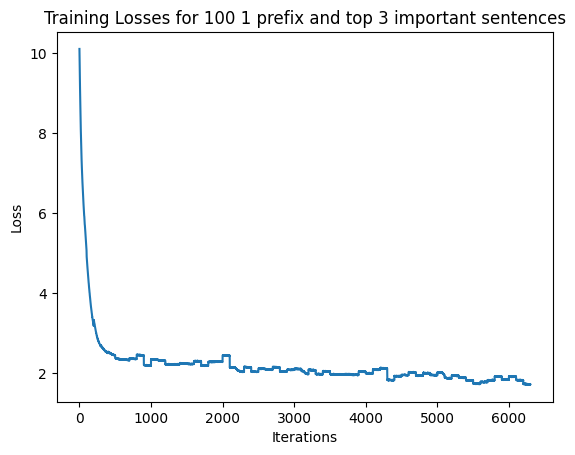

In [ ]:
import matplotlib.pyplot as plt
final_losses = [loss.item() for loss in losses]
# Create a figure and axis object
fig, ax = plt.subplots()

# Create the line plot
ax.plot(final_losses)

# Add a title and axis labels
ax.set_title('Training Losses for 100 1 prefix and top 3 important sentences')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')

# Display the plot
plt.show()

In [ ]:
new_test_dataset.set_format("pytorch")

In [ ]:
def top_k_logits(logits, k,topk=0.7):
    v, ix = torch.topk(logits, k)
    out = logits.clone()
    out[out < v[:, [-1]]] = -float('Inf')
    return out

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

In [ ]:
def get_rouge_score(generated_summary, reference_summary):
  rouge = Rouge()

  # Calculate ROUGE-1, ROUGE-2, and ROUGE-L scores
  scores = rouge.get_scores(generated_summary, reference_summary, avg=True)

  rouge_1_score = scores['rouge-1']['f']
  rouge_2_score = scores['rouge-2']['f']
  rouge_l_score = scores['rouge-l']['f']

  # Print the scores
  #print(f"ROUGE-1 score: {rouge_1_score:.4f}")
  #print(f"ROUGE-2 score: {rouge_2_score:.4f}")
  #print(f"ROUGE-L score: {rouge_l_score:.4f}")
  return [rouge_1_score, rouge_2_score, rouge_l_score]

In [ ]:
def generate(examples, temperature, output_length = 120):
  model.eval();
  with torch.no_grad():
    tokens = []
    input_ids = examples['input_ids'].cuda()
    #attention_mask = torch.tensor(examples['attention_mask']).cuda()
    summary_ids = input_ids.clone()
    
    #summary_attention = attention_mask.clone()
    for k in range(output_length):
      logits = model(input_ids=input_ids).logits
      logits = logits[:, -1, :] / temperature
      logits = top_k_logits(logits, 10)
      probs = F.softmax(logits, dim=-1)   
      next_token = torch.multinomial(probs, num_samples=1)
      while next_token == tokenizer.pad_token_id:
          next_token = torch.multinomial(probs, num_samples=1)
      tokens.append(next_token)
      summary_ids = torch.cat([summary_ids, next_token], dim=1)
      input_ids = summary_ids
      #summary_attention = 
      #attention_mask = torch.cat([attention_mask,torch.full((1,1), 1).cuda()],1).cuda()
    #print(summary_ids)
    summary = tokenizer.decode(torch.tensor(tokens), skip_special_tokens=True)
    document = examples['document']
    rouge_score = get_rouge_score(summary, document)
    return {'output_example':summary,'document':document, 'rouge_score':rouge_score}

In [ ]:
new_test_dataset = new_test_dataset.select(range(50))

In [ ]:
temperatures = [0.8]
results = []
for temperature in temperatures:
  results.append(new_test_dataset.map(lambda example:generate(example,temperature,120)))

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
def get_average_rouge_score(scores):
    score_df = pd.DataFrame(scores,columns=['Rouge 1', 'Rouge 2', 'Rouge L'])
    avg = score_df.mean()
    return avg

In [ ]:
get_average_rouge_score(results[0]['rouge_score'])

Rouge 1    0.004243
Rouge 2    0.000000
Rouge L    0.004243
dtype: float32

In [ ]:
results[0]['output_example'][1]

' Complexmbudsman Testament Testament Testament strokes strokes Scient Scient strokes strokes exclaimrosso Olive strokes Tommy strokes units dexterityOsOsOsOsTruth AUT TPuble AUTikersattributeattribute Hampton Adelaide coined Literature Literaturechinchin TP AUTizersikers356chin Stamford Privacy 241 they they Jet kidding AFPgeonsgeons housing they TP Develop Develop Cellrosso Dude Privacy Privacy Privacy STAR EDT231 328 Jet Jet laz AFP 241geons they they gearing 3287777 gearing Privacy strokes exclaim exclaimchinchin they Jet Lois servant Womanibeibe Mast strokes strokes Gaddafiét77ttle OUT OUT OUT Privacy Privacy zooophonUPUPchin356 Scient they strokes exclaim AFP AFPophon'